In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
#Cargo el datasets de boston
data = datasets.load_boston()

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
type(data) #Bunch soporta todos los metodos de un diccionario

sklearn.utils.Bunch

In [6]:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(data.data[0])

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


In [8]:
print(data.target[0])

24.0


In [10]:
#Como los datos se encuentran en formato bunch, deben ser transformados a DataFrame pandas
import numpy as np
import pandas as pd

In [11]:
df = pd.DataFrame(data.data, columns=data.feature_names)

targets = pd.DataFrame(data.target, columns=['MEDV'])

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
targets.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [19]:
#Evaluando dos variables

X = df[["RM"]]
y = targets["MEDV"]

In [16]:
x.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [17]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [18]:
#Instanciamos al modelo
lm = linear_model.LinearRegression()

In [20]:
#Fiteamos el modelo

model = lm.fit(X, y)
predictions = lm.predict(X)

print('Intercepto=', ' ', model.intercept_)
print('RM =', ' ', model.coef_)
print('R2_train', ' ', model.score(X, y))

Intercepto=   -34.670620776438554
RM=   [9.10210898]
R2_train   0.4835254559913343


In [22]:
def sum_model(model, X):
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intercept', 'R2']))
    return(a)

In [23]:
sum_model(model, X)

,0
RM,9.102109
Intercept,-34.670621
R2,0.483525


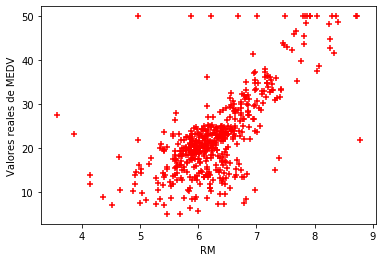

In [27]:
#Graficamoes la variable X contra la variable Y
plt.scatter(X, y , s=30, c='r', marker='+', zorder=10)
plt.xlabel("RM")
plt.ylabel("Valores reales de MEDV")
plt.show()


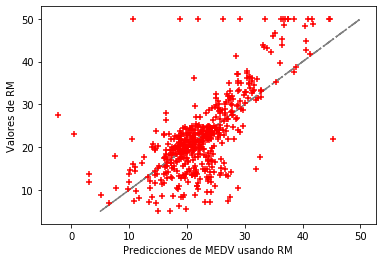

In [26]:
#Graficamos el modelo
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando RM")
plt.ylabel("Valores de RM")
plt.show()

In [29]:
print("EMC:", mean_squared_error(y, predictions))


EMC: 43.60055177116956
